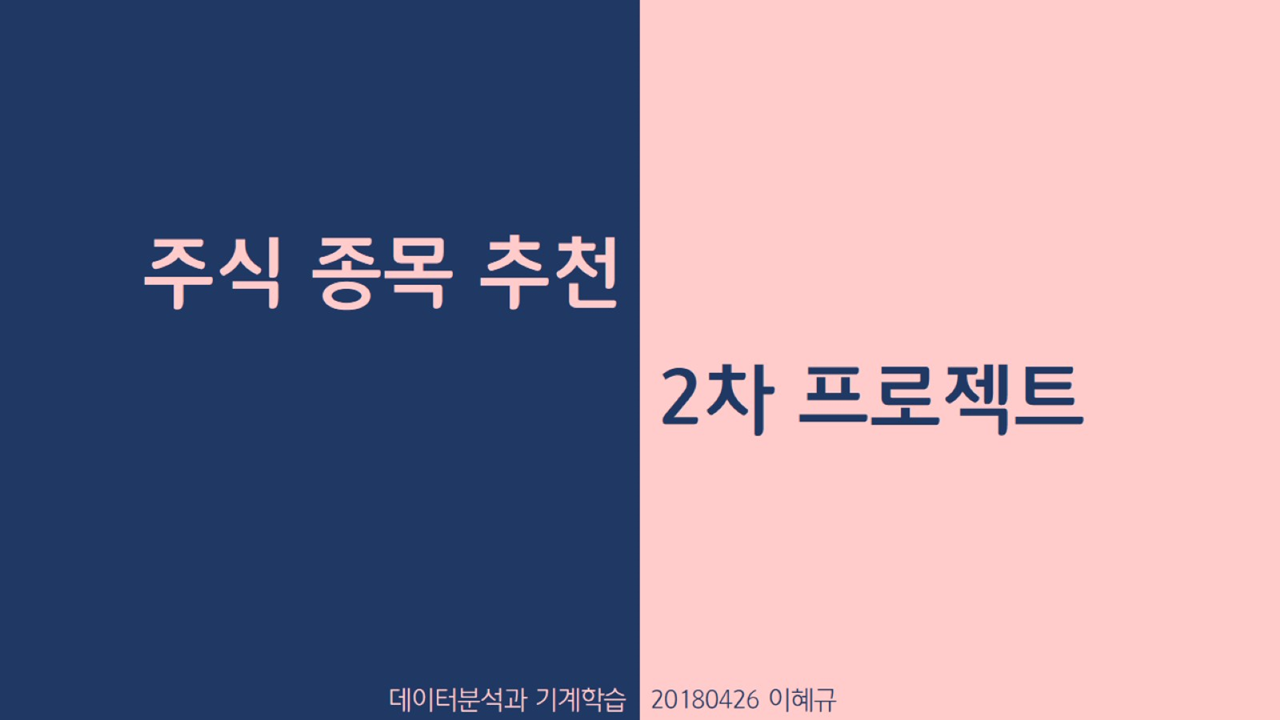

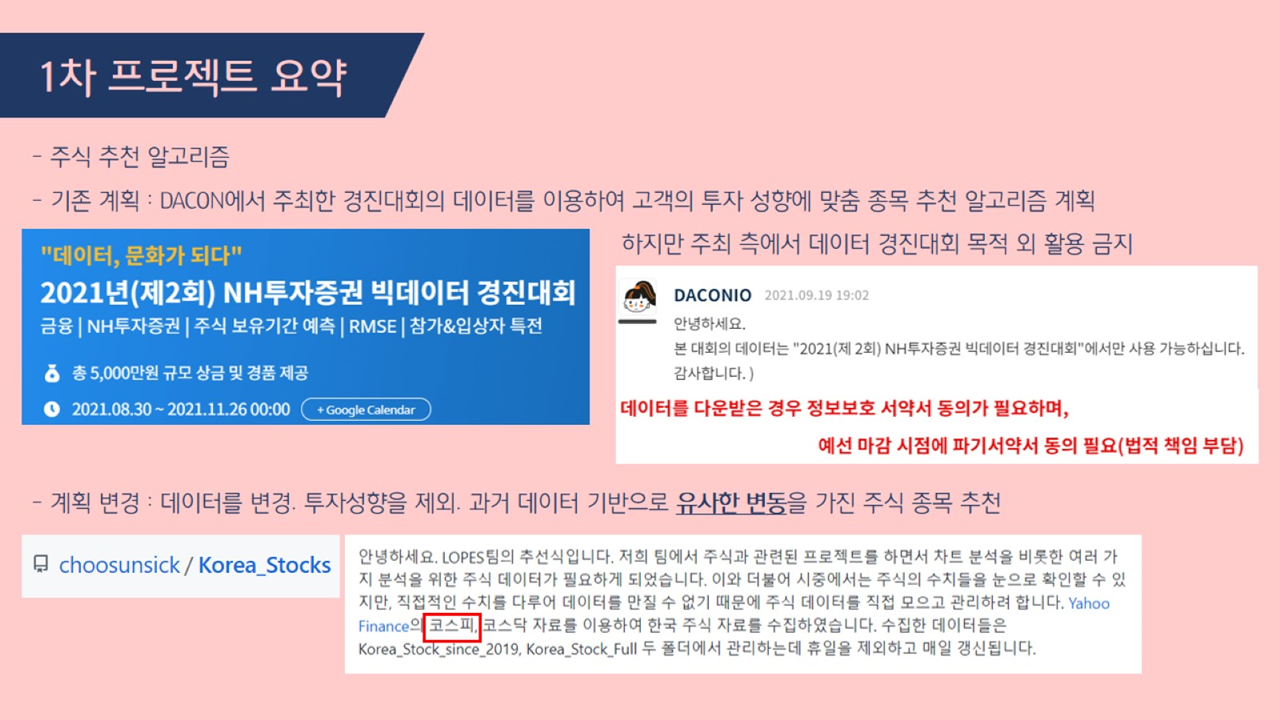
데이터출처 : https://github.com/choosunsick/Korea_Stocks.git

### 데이터 불러오기

In [1]:
import os
path='C:/Users/yhg31/OneDrive/바탕 화면/Korea_Stocks-master/Korea_Stocks-master/Korea_Stocks_Full'
forders= os.listdir(path)
len(forders)

200

In [2]:
forders

['000070.csv',
 '000080.csv',
 '000100.csv',
 '000120.csv',
 '000150.csv',
 '000210.csv',
 '000240.csv',
 '000270.csv',
 '000640.csv',
 '000660.csv',
 '000670.csv',
 '000720.csv',
 '000810.csv',
 '000880.csv',
 '000990.csv',
 '001040.csv',
 '001060.csv',
 '001120.csv',
 '001230.csv',
 '001430.csv',
 '001450.csv',
 '001680.csv',
 '001740.csv',
 '001800.csv',
 '002240.csv',
 '002270.csv',
 '002350.csv',
 '002380.csv',
 '002790.csv',
 '003000.csv',
 '003240.csv',
 '003410.csv',
 '003490.csv',
 '003520.csv',
 '003550.csv',
 '003670.csv',
 '003850.csv',
 '004000.csv',
 '004020.csv',
 '004170.csv',
 '004370.csv',
 '004490.csv',
 '004800.csv',
 '004990.csv',
 '005180.csv',
 '005250.csv',
 '005300.csv',
 '005380.csv',
 '005440.csv',
 '005490.csv',
 '005610.csv',
 '005830.csv',
 '005930.csv',
 '005940.csv',
 '006120.csv',
 '006260.csv',
 '006280.csv',
 '006360.csv',
 '006390.csv',
 '006400.csv',
 '006650.csv',
 '006800.csv',
 '007070.csv',
 '007310.csv',
 '007570.csv',
 '007700.csv',
 '007770.c

In [3]:
import pandas as pd
df = pd.DataFrame()

for i in range(200): 
    link=path+"/"+forders[i]
    dfdf= pd.read_csv(link) 
    dfdf["name"]=forders[i].split(".csv")[0]
    df = pd.concat([df, dfdf])

In [4]:
df

,Date,Open,High,Low,Close,Volume,Adj_Close,name
0,2005-09-29,43517,45553,43466,0,49472,36129,000070
1,2005-09-30,45808,47436,45604,0,72960,37515,000070
2,2005-10-04,47742,47742,46011,0,25256,37393,000070
3,2005-10-05,46927,47131,44841,0,36053,35925,000070
4,2005-10-06,44383,44993,43110,0,38066,34987,000070
...,...,...,...,...,...,...,...,...
531,2021-04-09,10500,10500,10200,10300,19929467,10300,316140
532,2021-04-12,10300,10450,10250,10400,2507164,10400,316140
533,2021-04-13,10450,10450,10300,10350,2085798,10350,316140
534,2021-04-14,10350,10400,10300,10400,1503857,10400,316140


In [5]:
#분석 시 대문자는 치기 힘들어서 소문자로 변경
df=df.rename(columns={'Date':'date', 'Open':'open', 'High':'high', 'Low':'low', 'Close':'close', 'Volume':'volume', 'Adj_Close':'adj_close'})
df=df.reset_index(drop=True)
df

,date,open,high,low,close,volume,adj_close,name
0,2005-09-29,43517,45553,43466,0,49472,36129,000070
1,2005-09-30,45808,47436,45604,0,72960,37515,000070
2,2005-10-04,47742,47742,46011,0,25256,37393,000070
3,2005-10-05,46927,47131,44841,0,36053,35925,000070
4,2005-10-06,44383,44993,43110,0,38066,34987,000070
...,...,...,...,...,...,...,...,...
832347,2021-04-09,10500,10500,10200,10300,19929467,10300,316140
832348,2021-04-12,10300,10450,10250,10400,2507164,10400,316140
832349,2021-04-13,10450,10450,10300,10350,2085798,10350,316140
832350,2021-04-14,10350,10400,10300,10400,1503857,10400,316140


#### 데이터 설명

속성명|뜻|활용
---|---|---
date|해당 데이터 날짜|년/월/일/요일 분리 예정
open|시작한 가격(시가)|
high|최고 가격|
low|최저 가격|
close|종료시 가격(종가)|
volume|거래량
adj_close|수정주가(분할, 배당, 배분, 신주 발생이 된 경우를 고려해 주식 가격을 조정한 가격)|중요하게 사용할 부분
name|주식명

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832352 entries, 0 to 832351
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       832352 non-null  object
 1   open       832352 non-null  int64 
 2   high       832352 non-null  int64 
 3   low        832352 non-null  int64 
 4   close      832352 non-null  int64 
 5   volume     832352 non-null  int64 
 6   adj_close  832352 non-null  int64 
 7   name       832352 non-null  object
dtypes: int64(6), object(2)
memory usage: 50.8+ MB


In [7]:
#용량 줄이는 코드
import numpy as np

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """

    for col in df.columns:
        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df
df = reduce_mem_usage(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832352 entries, 0 to 832351
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       832352 non-null  object
 1   open       832352 non-null  int32 
 2   high       832352 non-null  int32 
 3   low        832352 non-null  int32 
 4   close      832352 non-null  int32 
 5   volume     832352 non-null  int64 
 6   adj_close  832352 non-null  int32 
 7   name       832352 non-null  object
dtypes: int32(5), int64(1), object(2)
memory usage: 34.9+ MB


### 데이터 타입 변경 및 열 추가

In [8]:
#데이터 타입 변경
df["name"]=df["name"].astype('int')
df["date"]=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832352 entries, 0 to 832351
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       832352 non-null  datetime64[ns]
 1   open       832352 non-null  int32         
 2   high       832352 non-null  int32         
 3   low        832352 non-null  int32         
 4   close      832352 non-null  int32         
 5   volume     832352 non-null  int64         
 6   adj_close  832352 non-null  int32         
 7   name       832352 non-null  int32         
dtypes: datetime64[ns](1), int32(6), int64(1)
memory usage: 31.8 MB


In [9]:
#날짜형 데이터 년/월/일/요일 구분
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day"]=df["date"].dt.day
df["dayofweek"]=df["date"].dt.dayofweek
df

,date,open,high,low,close,volume,adj_close,name,year,month,day,dayofweek
0,2005-09-29,43517,45553,43466,0,49472,36129,70,2005,9,29,3
1,2005-09-30,45808,47436,45604,0,72960,37515,70,2005,9,30,4
2,2005-10-04,47742,47742,46011,0,25256,37393,70,2005,10,4,1
3,2005-10-05,46927,47131,44841,0,36053,35925,70,2005,10,5,2
4,2005-10-06,44383,44993,43110,0,38066,34987,70,2005,10,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
832347,2021-04-09,10500,10500,10200,10300,19929467,10300,316140,2021,4,9,4
832348,2021-04-12,10300,10450,10250,10400,2507164,10400,316140,2021,4,12,0
832349,2021-04-13,10450,10450,10300,10350,2085798,10350,316140,2021,4,13,1
832350,2021-04-14,10350,10400,10300,10400,1503857,10400,316140,2021,4,14,2


In [10]:
#데이터 순서를 보기 편하게 변경
df=df[["name", "adj_close", "open", "high", "low", "close", "volume", "date", "year", "month", "day", "dayofweek"]]
df

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
0,70,36129,43517,45553,43466,0,49472,2005-09-29,2005,9,29,3
1,70,37515,45808,47436,45604,0,72960,2005-09-30,2005,9,30,4
2,70,37393,47742,47742,46011,0,25256,2005-10-04,2005,10,4,1
3,70,35925,46927,47131,44841,0,36053,2005-10-05,2005,10,5,2
4,70,34987,44383,44993,43110,0,38066,2005-10-06,2005,10,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
832347,316140,10300,10500,10500,10200,10300,19929467,2021-04-09,2021,4,9,4
832348,316140,10400,10300,10450,10250,10400,2507164,2021-04-12,2021,4,12,0
832349,316140,10350,10450,10450,10300,10350,2085798,2021-04-13,2021,4,13,1
832350,316140,10400,10350,10400,10300,10400,1503857,2021-04-14,2021,4,14,2


### 데이터 결측치 확인

In [11]:
df[df["adj_close"]==0]

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
2960,70,0,0,0,0,0,0,2017-12-27,2017,12,27,2
3299,70,0,0,0,0,0,0,2019-05-16,2019,5,16,3
6524,80,0,0,0,0,0,0,2017-12-27,2017,12,27,2
6861,80,0,0,0,0,0,0,2019-05-16,2019,5,16,3
11786,100,0,0,0,0,0,0,2017-12-27,2017,12,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...
830310,285130,0,0,0,0,0,0,2018-01-09,2018,1,9,1
830639,285130,0,0,0,0,0,0,2019-05-16,2019,5,16,3
831114,294870,0,0,0,0,0,0,2018-06-11,2018,6,11,0
831341,294870,0,0,0,0,0,0,2019-05-16,2019,5,16,3


In [12]:
df[df["adj_close"]==0]

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
2960,70,0,0,0,0,0,0,2017-12-27,2017,12,27,2
3299,70,0,0,0,0,0,0,2019-05-16,2019,5,16,3
6524,80,0,0,0,0,0,0,2017-12-27,2017,12,27,2
6861,80,0,0,0,0,0,0,2019-05-16,2019,5,16,3
11786,100,0,0,0,0,0,0,2017-12-27,2017,12,27,2
...,...,...,...,...,...,...,...,...,...,...,...,...
830310,285130,0,0,0,0,0,0,2018-01-09,2018,1,9,1
830639,285130,0,0,0,0,0,0,2019-05-16,2019,5,16,3
831114,294870,0,0,0,0,0,0,2018-06-11,2018,6,11,0
831341,294870,0,0,0,0,0,0,2019-05-16,2019,5,16,3


In [13]:
#주가가 0인 데이터는 제거
df_drop=df[df["adj_close"]==0].index
df=df.drop(index=df_drop, axis=0)
df=df.reset_index(drop=True)
df

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
0,70,36129,43517,45553,43466,0,49472,2005-09-29,2005,9,29,3
1,70,37515,45808,47436,45604,0,72960,2005-09-30,2005,9,30,4
2,70,37393,47742,47742,46011,0,25256,2005-10-04,2005,10,4,1
3,70,35925,46927,47131,44841,0,36053,2005-10-05,2005,10,5,2
4,70,34987,44383,44993,43110,0,38066,2005-10-06,2005,10,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
828250,316140,10300,10500,10500,10200,10300,19929467,2021-04-09,2021,4,9,4
828251,316140,10400,10300,10450,10250,10400,2507164,2021-04-12,2021,4,12,0
828252,316140,10350,10450,10450,10300,10350,2085798,2021-04-13,2021,4,13,1
828253,316140,10400,10350,10400,10300,10400,1503857,2021-04-14,2021,4,14,2


In [14]:
df[df["open"]==0]

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
173599,3550,76100,0,77000,75600,76100,191761,2019-02-13,2019,2,13,2
677735,51910,378000,0,378500,371000,378000,238937,2019-02-13,2019,2,13,2
726106,71840,48150,0,50500,48000,48150,187761,2019-02-13,2019,2,13,2
787342,115390,19600,0,19600,19000,19600,136366,2019-02-13,2019,2,13,2
817641,207940,379500,0,382000,377500,379500,81128,2019-02-13,2019,2,13,2


In [15]:
#시가가 0인 데이터 제거
df_drop=df[df["open"]==0].index
df=df.drop(index=df_drop, axis=0)
df=df.reset_index(drop=True)
df

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
0,70,36129,43517,45553,43466,0,49472,2005-09-29,2005,9,29,3
1,70,37515,45808,47436,45604,0,72960,2005-09-30,2005,9,30,4
2,70,37393,47742,47742,46011,0,25256,2005-10-04,2005,10,4,1
3,70,35925,46927,47131,44841,0,36053,2005-10-05,2005,10,5,2
4,70,34987,44383,44993,43110,0,38066,2005-10-06,2005,10,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
828245,316140,10300,10500,10500,10200,10300,19929467,2021-04-09,2021,4,9,4
828246,316140,10400,10300,10450,10250,10400,2507164,2021-04-12,2021,4,12,0
828247,316140,10350,10450,10450,10300,10350,2085798,2021-04-13,2021,4,13,1
828248,316140,10400,10350,10400,10300,10400,1503857,2021-04-14,2021,4,14,2


In [16]:
df[df["high"]==0]

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek


In [17]:
df[df["low"]==0]

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek


In [18]:
df[df["close"]==0]

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
0,70,36129,43517,45553,43466,0,49472,2005-09-29,2005,9,29,3
1,70,37515,45808,47436,45604,0,72960,2005-09-30,2005,9,30,4
2,70,37393,47742,47742,46011,0,25256,2005-10-04,2005,10,4,1
3,70,35925,46927,47131,44841,0,36053,2005-10-05,2005,10,5,2
4,70,34987,44383,44993,43110,0,38066,2005-10-06,2005,10,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...
376013,9540,107069,107069,107069,107069,0,0,2017-04-27,2017,4,27,3
376014,9540,107069,107069,107069,107069,0,0,2017-04-28,2017,4,28,4
376015,9540,107069,107069,107069,107069,0,0,2017-05-02,2017,5,2,1
376016,9540,107069,107069,107069,107069,0,0,2017-05-04,2017,5,4,3


In [19]:
#종가가 0인 데이터 제거
df_drop=df[df["close"]==0].index
df=df.drop(index=df_drop, axis=0)
df=df.reset_index(drop=True)
df

,name,adj_close,open,high,low,close,volume,date,year,month,day,dayofweek
0,70,74031,84000,84000,79000,82300,71250,2011-12-05,2011,12,5,0
1,70,72322,81000,82000,72900,80400,75973,2011-12-06,2011,12,6,1
2,70,75381,80500,85800,78300,83800,70873,2011-12-07,2011,12,7,2
3,70,71063,83000,83800,78600,79000,77794,2011-12-08,2011,12,8,3
4,70,68184,77500,77500,75200,75800,54451,2011-12-09,2011,12,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...
807306,316140,10300,10500,10500,10200,10300,19929467,2021-04-09,2021,4,9,4
807307,316140,10400,10300,10450,10250,10400,2507164,2021-04-12,2021,4,12,0
807308,316140,10350,10450,10450,10300,10350,2085798,2021-04-13,2021,4,13,1
807309,316140,10400,10350,10400,10300,10400,1503857,2021-04-14,2021,4,14,2


In [20]:
#데이터 저장
df.to_csv("Korea_Stocks_Kospi.csv")